In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import math

import os



In [5]:
def b_transition(var, rate, dt=1):
    kb        = np.maximum(1.0 - math.exp(-rate*dt), 0)
    num_ind   = np.random.binomial(var, kb )

    return num_ind

def deterministic_transition(var, rate, dt=1):
    return var*dt*rate

def model(x, dt=1):
    S = x[0]
    I = x[1]
    R = x[2]

    gamma = 1/7
    beta  = 2.5*gamma
    N     = 1e6
    foi   =  beta * (I) / N

    # Stochastic transitions
    s2i     =  deterministic_transition(S, dt*foi)                 # susceptible to exposed
    i2r     =  deterministic_transition(I, dt*gamma) # exposed to infected reported who are not going to die

    # Updates
    S    = S   - s2i       # Susceptible
    I    = I   + s2i - i2r  # Infected reported
    R    = R   + i2r       # Recovered
    C    = s2i


    return [S, I, R, C]


In [6]:
N = 1e6
num_days = 100
x  = [N-0.01*N, 0.01*N, 0, 0.01*N]

x_sol      = np.zeros((num_days, 4))

x_sol[0, :] = x
for d_idx in range(1, num_days):
    x_sol[d_idx, :] = model(x_sol[d_idx-1, :])

x_sol_df = pd.DataFrame(x_sol, columns=["S", "I", "R", "C"]); x_sol_df.index.name="date"

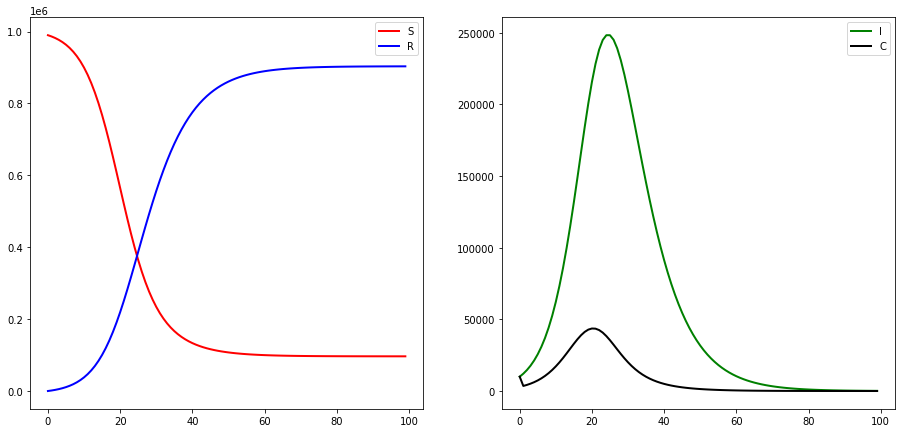

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))
ax[0].plot(x_sol_df.index.values, x_sol_df["S"], lw=2, c="r", label="S")
ax[0].plot(x_sol_df.index.values, x_sol_df["R"], lw=2, c="b", label="R")

ax[1].plot(x_sol_df.index.values, x_sol_df["I"], lw=2, c="g", label="I")
ax[1].plot(x_sol_df.index.values, x_sol_df["C"], lw=2, c="k", label="C")
ax[0].legend()
ax[1].legend()


In [59]:


def negative_binomial_loglikelihood(real_world_observations, model_observations, particle_dispersion=0.5):
    # Assume probability particle distribution is in the second dimension
    # Γ(r + y)p**r(1 − p)y) − ln (Γ(r)Γ(y + 1)


    # Assume log-likelihood is a negative binomial dist
    ll =  np.sum(np.log(np.random.gamma(real_world_observations+real_world_observations)) + model_observations*np.log(1-particle_dispersion) - np.log(np.random.gamma(real_world_observations+1)), 1)

    return ll

def poisson_loglikelihood(real_world_observations, model_observations, num_times=100):
    nll =  -np.sum(model_observations,1) + np.sum(real_world_observations*np.log(model_observations),1) # Poisson ML
    return - nll

In [58]:
def update_weights(weights, ):
    # Update weights using sequential importance sampling
    # w_{t-1}:       Previous weights
    # p(y_t|z_t):    Adjust state space
    # p(z_t|z_t-1 )
    # q(z_t)         Probability of observing the observation (Poisson)
    # w_t <- w_{t-1} * p(y_t|z_t) * p(z_t|z_t-1 ) / q(z_t)




(array([-9374.1756896]), array([-6351.4290073]))

In [ ]:


def resample_particles(particles, num_particles=1e5, proportion_resampled=0.1):
    """[summary]

    Args:
        particles ([type]): Dictionary with the particles of the SMC
        num_particles ([type], optional): Number of particles used. Defaults to 1e5.
        proportion_resampled (float, optional): Proportion of particles to be resampled. Defaults to 0.1.
    """